In [1]:
curr_dir = f'/user_data/csimmon2/git_repos/ptoc'

import sys
sys.path.insert(0,curr_dir)
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import scipy.stats as stats
import scipy
import statsmodels.api as s
from sklearn import metrics

import pdb
import ptoc_params as params

from plotnine import *
#from plotnine import ggplot, aes, geom_point


#hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_dir = params.data_dir
results_dir = params.results_dir
fig_dir = params.fig_dir

sub_info = params.sub_info
task_info = params.task_info

suf = params.suf
rois = params.rois
hemis = params.hemis

#load subject info
sub_info = pd.read_csv(f'{curr_dir}/sub_info.csv')

#mni = load_mni152_brain_mask()

In [3]:
#%reset -f



#load data summary
analysis_type = 'selectivity'
data_summary = pd.read_csv(f'{results_dir}/{analysis_type}/{analysis_type}_summary{suf}.csv')


In [121]:
#skip
sub = 'sub-066'
#print (sub)  
print(sub)

sub-066


In [17]:
#default_sub_code = 'N/A'  # Default value for subjects without a sub_code

for sub in data_summary['sub'].unique():
    sub_info_subset = sub_info[sub_info['sub'] == sub]
    if not sub_info_subset.empty:
        sub_code = sub_info_subset['code'].values[0]
    else:
        sub_code = ''
    print("Subject:", sub)
    print("Subject Code:", sub_code)
    data_summary.loc[data_summary['sub'] == sub, 'sub_code'] = sub_code

Subject: sub-007
Subject Code: 
Subject: sub-066
Subject Code: JF
Subject: sub-069
Subject Code: NM
Subject: sub-078
Subject Code: 
Subject: sub-079
Subject Code: 
Subject: sub-090
Subject Code: KT
Subject: sub-092
Subject Code: FO
Subject: sub-hemispace1006
Subject Code: KN
Subject: sub-025
Subject Code: nan
Subject: sub-038
Subject Code: nan
Subject: sub-057
Subject Code: nan
Subject: sub-059
Subject Code: nan
Subject: sub-064
Subject Code: nan
Subject: sub-067
Subject Code: nan
Subject: sub-068
Subject Code: nan
Subject: sub-071
Subject Code: nan
Subject: sub-083
Subject Code: nan
Subject: sub-084
Subject Code: nan
Subject: sub-085
Subject Code: nan
Subject: sub-087
Subject Code: nan
Subject: sub-088
Subject Code: nan
Subject: sub-093
Subject Code: nan
Subject: sub-094
Subject Code: nan
Subject: sub-095
Subject Code: nan
Subject: sub-096
Subject Code: nan
Subject: sub-097
Subject Code: nan
Subject: sub-107
Subject Code: nan
Subject: sub-004
Subject Code: 
Subject: sub-074
Subject Co

In [4]:
rois = ['ventral_visual_cortex', 'ventral_visual_cortex', 'dorsal_visual_cortex', 'dorsal_visual_cortex']

analysis_type = 'selectivity'

# Load data summary
data_summary = pd.read_csv(f'{results_dir}/{analysis_type}/{analysis_type}_summary{suf}.csv')

# Extract controls
data_summary = data_summary[data_summary['group'] == 'control']

# Loop through rois
for roi in rois:
    # Extract data for roi
    curr_data = data_summary[data_summary['roi'] == roi]

    # Convert data to wide by subject
    curr_data = curr_data.pivot(index='sub', columns='hemi', values='sum_selec_norm')

    # Run paired t-test between hemis
    t, p = stats.ttest_rel(curr_data['left'], curr_data['right'])

    # Calculate effect size
    d = (curr_data['left'].mean() - curr_data['right'].mean()) / np.sqrt((curr_data['left'].std() ** 2 + curr_data['right'].std() ** 2) / 2)

    print(t, curr_data.shape[0]-1, p, d) #printing t, df, p, and d


1.7707350495354166 18 0.09353775662849143 0.17427291363459263
1.7707350495354166 18 0.09353775662849143 0.17427291363459263
0.5334435035972601 18 0.6002523382385287 0.06446219896058522
0.5334435035972601 18 0.6002523382385287 0.06446219896058522


In [20]:
def create_violin(resample_data,data_mean, indiv_data,  analysis, analysis_name, roi, cond):
    seed = 2
    p = ggplot(resample_data, aes(x = 'group', y = analysis, fill = 'hemi'))  + \
                geom_violin( alpha = .3, position =  position_dodge(.9) ) + \
                geom_jitter(indiv_data,aes(x = 'group', y = analysis, fill = 'hemi'), shape = 'o', size = 3, position = position_jitterdodge(dodge_width=.9, jitter_width = 0.2, random_state = seed)) + \
                geom_linerange(data_mean, aes(x = 'group', ymin = f'{analysis} - se', ymax = f'{analysis} + se', fill = 'hemi'), size = 1,position = position_dodge(.9)) + \
                geom_point(data_mean, aes(x = 'group', y = analysis, fill = 'hemi'), shape = 's', size = 3,position = position_dodge(.9)) + \
                geom_label(indiv_data, aes(x = 'group', y = analysis, label = 'sub_code'),  position = position_jitterdodge(dodge_width=.9, jitter_width = 0.2, random_state = seed),  size = 8) + \
                scale_fill_manual(values = ['#ee7183', '#7398af']) + \
                xlab('Group') + ylab(analysis_name) + \
                theme_classic() + \
                theme(text = element_text(color ='black'), 
                    axis_text_x= element_text(angle = 30, size = 12),
                    axis_text_y= element_text(size = 12),
                    axis_title=element_text(size = 14),
                    axis_line=element_line(), 
                    legend_position = 'none',
                    panel_border=element_blank(),
                    figure_size = (3, 5))+ \
                    labs(fill='Hemisphere') #+ ggtitle(f'{cond}')

    p.save(f'{fig_dir}/analysis/{roi}_{cond}.png', width=3, height=5, dpi = 300)
    print(p)

sum_selec_norm objects dorsal_visual_cortex


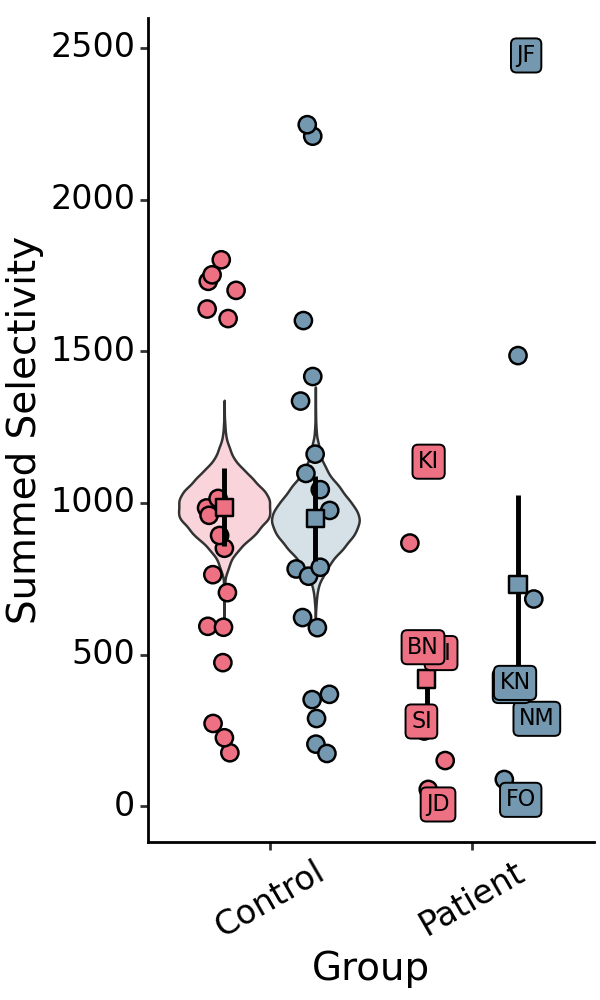


mean_act objects dorsal_visual_cortex


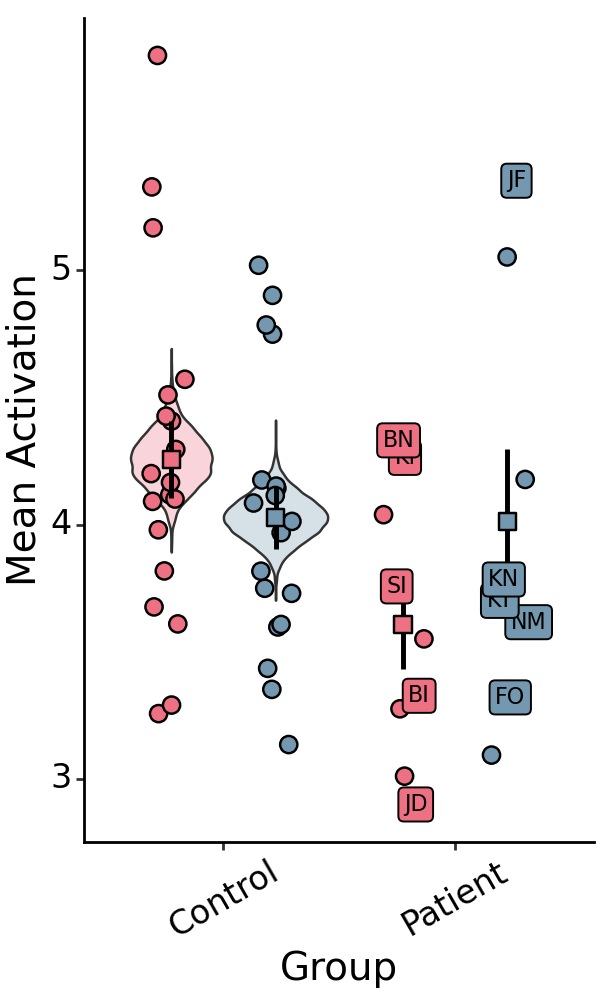


volume objects dorsal_visual_cortex


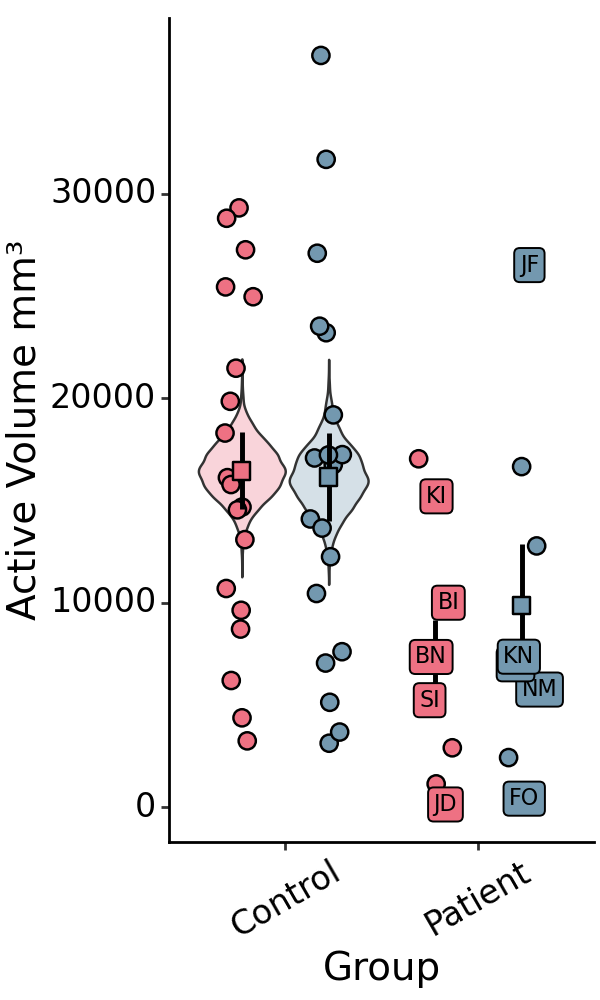

In [24]:
'''
Create selectivity plots
'''

analysis_type = 'selectivity'

#load data summary
data_summary = pd.read_csv(f'{results_dir}/{analysis_type}/{analysis_type}_summary{suf}.csv')

#capitalize hemi
data_summary['hemi'] = data_summary['hemi'].str.capitalize()

# for each sub in data_summary, get the sub's code from sub_info
#for sub in data_summary['sub'].unique():
#    sub_code = sub_info[sub_info['sub'] == sub]['code'].values[0]
#    data_summary.loc[data_summary['sub'] == sub, 'sub_code'] = sub_code

for sub in data_summary['sub'].unique():
    sub_info_subset = sub_info[sub_info['sub'] == sub]
    if not sub_info_subset.empty:
        sub_code = sub_info_subset['code'].values[0]
    else:
        sub_code = ''
    #print("Subject:", sub)
    #print("Subject Code:", sub_code)
    data_summary.loc[data_summary['sub'] == sub, 'sub_code'] = sub_code

analyses = ['sum_selec_norm', 'mean_act','volume']
analysis_names = ['Summed Selectivity', 'Mean Activation', 'Active Volume mm\u00b3']
#analyses = ['sum_selec_norm']

conds = ['objects']

rois = ['dorsal_visual_cortex','dorsal_visual_cortex','ventral_visual_cortex','ventral_visual_cortex']
#rois = ['ventral_visual_cortex','ventral_visual_cortex','dorsal_visual_cortex','dorsal_visual_cortex'],
       #'hemi','hemi','hemi','hemi', 'hemi','hemi' ]


for analysis, analysis_name in zip(analyses,analysis_names):

        
    act_resamples = pd.read_csv(f'{results_dir}/{analysis_type}/resamples/{analysis}_resamples{suf}.csv')

    #replace columns with dorsal visual cortex with dvc
    for col in act_resamples.columns:
        if 'dorsal_visual_cortex' in col:
            new_col = col.replace('dorsal_visual_cortex','dvc')
            act_resamples.rename(columns={col:new_col}, inplace=True)
        if 'ventral_visual_cortex' in col:
            new_col = col.replace('ventral_visual_cortex','vvc')
            act_resamples.rename(columns={col:new_col}, inplace=True)

    #convert act resamples to long format
    act_resamples_long = pd.melt(act_resamples, var_name='type', value_name=analysis)

    #split type column in cond, hemi, roi
    act_resamples_long[['hemi','roi']] = act_resamples_long['type'].str.split('_',expand=True)

    #rename roi column
    act_resamples_long['roi'].replace('dvc','dorsal_visual_cortex',inplace=True)
    act_resamples_long['roi'].replace('vvc','ventral_visual_cortex',inplace=True)

    #capitalize hemi
    act_resamples_long['hemi'] = act_resamples_long['hemi'].str.capitalize()
    act_resamples_long['group'] = 'Control'
    
    for cond, roi in zip(conds, rois):
        print(analysis, cond, roi)

        resample_data = act_resamples_long[(act_resamples_long['roi']==roi)]
        curr_summary = data_summary[(data_summary['roi']==roi)]
        curr_summary['group'] = curr_summary['group'].str.capitalize()

        #create mean and SE data for patients
        data_mean = curr_summary.groupby(['hemi', 'group']).mean().reset_index()
        data_mean_se = curr_summary.groupby(['hemi', 'group']).sem().reset_index()
        data_mean['se'] = data_mean_se[analysis]
        data_mean['group'] = data_mean['group'].str.capitalize()

        create_violin(resample_data, data_mean, curr_summary, analysis, analysis_name, roi, cond)

In [12]:
#data_summary = pd.read_csv(f'{results_dir}/{analysis_type}/{analysis_type}_summary{suf}.csv')
print(f'{results_dir}/{analysis_type}/{analysis_type}_summary{suf}.csv') #path should be ? /user_data/csimmon2/git_repos/ptoc/results/selectivity/selectivity_summary.csv
print (f'{results_dir}/{analysis_type}/resamples/{analysis}_resamples{suf}.csv') #path should be? /user_data/csimmon2/git_repos/ptoc/results/selectivity/resamples/sum_selec_norm_resamples.csv

/user_data/csimmon2/git_repos/ptoc/results/selectivity/selectivity_summary.csv
/user_data/csimmon2/git_repos/ptoc/results/selectivity/resamples/volume_resamples.csv


In [ ]:
resample_data = act_resamples_long[(act_resamples_long['roi']==roi)]

In [ ]:
'''
Create Decoding plots
'''

#load data summary
data_summary = pd.read_csv(f'{results_dir}/hemispace_decoding{suf}.csv')

# for each sub in data_summary, get the sub's code from sub_info
for sub in data_summary['sub'].unique():
    sub_code = sub_info[sub_info['sub'] == sub]['code'].values[0]
    data_summary.loc[data_summary['sub'] == sub, 'sub_code'] = sub_code


analyses = ['acc', 'mean_act','volume']
analysis_names = ['Decoding Accuracy %']
conds = ['space','tool','face','word']

rois = ['dorsal_visual_cortex','dorsal_visual_cortex','ventral_visual_cortex','ventral_visual_cortex']

conds = ['word', 'face','tool','space','scene','scene','word', 'face','tool','space','scene','scene']

#rois = ['dorsal_visual_cortex','dorsal_visual_cortex','ventral_visual_cortex','ventral_visual_cortex']
rois = ['ventral_visual_cortex','ventral_visual_cortex','dorsal_visual_cortex','dorsal_visual_cortex', 'ventral_visual_cortex','dorsal_visual_cortex',
        'hemi','hemi','hemi','hemi', 'hemi','hemi' ]


for analysis, analysis_name in zip(analyses,analysis_names):
    for cond, roi in zip(conds, rois):
        curr_data = data_summary[(data_summary['cond'] == cond) & (data_summary['roi'] ==roi)]
        #capitalize hemi amd group
        curr_data['hemi'] = curr_data['hemi'].str.capitalize()
        curr_data['group'] = curr_data['group'].str.capitalize()


        mean_data = curr_data.groupby(by = ['group', 'hemi']).mean().reset_index()
        temp_se  = curr_data.groupby(by = ['group', 'hemi']).sem().reset_index()
        mean_data['se'] = temp_se[analysis]

        seed = 2
        #plot grouped bar plot with plotnine
        p = ggplot(mean_data, aes(x = 'group', y = analysis, fill = 'hemi'))  + \
                    geom_col(stat = 'identity', color = 'black', position = 'dodge') + \
                    geom_linerange(aes(x='group', ymin = f'{analysis} - se', ymax = f'{analysis} + se'), position = position_dodge(width = .9)) +\
                    geom_jitter(curr_data,aes(x = 'group', y = analysis, fill = 'hemi'), shape = 'o', size = 3, position = position_jitterdodge(dodge_width=.9, jitter_width = 0.3, random_state = seed)) + \
                    scale_fill_manual(values = ['#ee7183', '#7398af']) + \
                    theme_classic() + geom_hline(yintercept =.5, linetype ='dashed') + \
                    geom_label(curr_data, aes(x = 'group', y = analysis, label = 'sub_code'),  position = position_jitterdodge(dodge_width=1, jitter_width = 0.3, random_state = seed),  size = 8) + \
                    xlab('Group') + ylab(analysis_name) + \
                    theme(text = element_text(color ='black'), 
                        axis_text_x= element_text(angle = 30, size = 12),
                        axis_text_y= element_text(size = 12),
                        axis_title=element_text(size = 14),
                        axis_line=element_line(), 
                        legend_position = 'none',
                        panel_border=element_blank(),
                        figure_size = (3, 5))+ \
                        labs(fill='Hemisphere') + ggtitle(cond.capitalize())

                    

        print(p)
        p.save(f'{fig_dir}/{analysis}/{roi}_{cond}.png', width=3, height=5, dpi = 300)
        
                    


In [ ]:
def create_histplot(boot_data, sub_data, group,metric, title, save=True):
    bin_range = [np.min(boot_data)-np.std(boot_data), np.max(boot_data)+np.std(boot_data)]
    sns.histplot(boot_data, binrange = bin_range)
    #add x axis label
    plt.xlabel(metric)
    
    for sub, val in zip(sub_data['sub'], sub_data[metric]):
        
        
        #add a line for each patient
        plt.axvline(val, color = 'red')
        rand_int = np.random.randint(100,500)

        #for patients add their code
        if group == 'patient':
            #find code corresponding to sub
            sub_code = sub_info[sub_info['sub'] == sub]['code'].values[0]
            #add text for each patient
            plt.text(val+(np.std(boot_data)/3), rand_int, sub_code, color = 'red')

    #add title
    plt.title(title)

    #if save is true, save figure
    if save:
        file_name = title.replace(' ','_')
        file_name = f'{metric}_{file_name}{suf}'
        plt.savefig(f'{fig_dir}/hist/indiv/{file_name}.png')
    
    #random number between 100 and 500
   


In [ ]:
"""
Plot each individual patient's data on distribution of control data
"""

conds = ['space','feat', 'tool','non_tool', 'object','face', 'word']
rois = ['dorsal_visual_cortex','dorsal_visual_cortex',
'dorsal_visual_cortex', 'dorsal_visual_cortex', 
'ventral_visual_cortex', 'ventral_visual_cortex','ventral_visual_cortex']

conds = ['space', 'tool','face', 'word']
rois = ['dorsal_visual_cortex','dorsal_visual_cortex',
'ventral_visual_cortex', 'ventral_visual_cortex']

summary_val = ['mean_act', 'sum_selec_norm']
for val in summary_val:
    act_resamples = pd.read_csv(f'{results_dir}/{val}_resamples{suf}.csv')
    for control_hemi in hemis:

        for patient_hemi in hemis:
            for cond, roi in zip(conds, rois):
                control_col = f'{cond}_{control_hemi}_{roi}'

                control_data = act_resamples[control_col]
                
                #extract patient data from summary
                patient_data = data_summary[(data_summary['group'] == 'patient') & (data_summary['cond'] == cond) & (data_summary['hemi'] == patient_hemi) & (data_summary['roi'] == roi)][['sub',val]]
                #sub_names = patient_data = data_summary[(data_summary['group'] == 'patient') & (data_summary['cond'] == cond) & (data_summary['hemi'] == hemi) & (data_summary['roi'] == roi)]
                roi_name = roi.split('_')[0]
                title = f'{cond} patient {patient_hemi} {roi_name} vs control {control_hemi} {roi_name}'
                create_histplot(control_data, patient_data,'patient',val, title)
                plt.pause(.001)




In [ ]:
"""
Load each fig image and arrange in 2x2 subplot
"""


conds = ['space','feat', 'tool','non_tool', 'object','face', 'word']
rois = ['dorsal_visual_cortex','dorsal_visual_cortex',
'dorsal_visual_cortex', 'dorsal_visual_cortex', 
'ventral_visual_cortex', 'ventral_visual_cortex','ventral_visual_cortex']

conds = ['space', 'tool','face', 'word']
rois = ['dorsal_visual_cortex','dorsal_visual_cortex',
'ventral_visual_cortex', 'ventral_visual_cortex']

summary_val = ['mean_act', 'sum_selec_norm']
for val in summary_val:
    #act_resamples = pd.read_csv(f'{results_dir}/{val}_resamples{suf}.csv')
    for cond, roi in zip(conds, rois):
        print(cond,roi)
        fig, axs = plt.subplots(2,2, figsize = (10,8))
        fig.patch.set_visible(False)
        for patient_hemi in hemis:
            for control_hemi in hemis:
                roi_name = roi.split('_')[0]
                file_name = f'{val}_{cond}_patient_{patient_hemi}_{roi_name}_vs_control_{control_hemi}_{roi_name}{suf}'
                img = mpimg.imread(f'{fig_dir}/hist/indiv/{file_name}.png')
                axs[hemis.index(control_hemi),hemis.index(patient_hemi)].imshow(img)

                
                axs[hemis.index(control_hemi),hemis.index(patient_hemi)].spines['top'].set_visible(False)
                axs[hemis.index(control_hemi),hemis.index(patient_hemi)].spines['right'].set_visible(False)
                axs[hemis.index(control_hemi),hemis.index(patient_hemi)].spines['bottom'].set_visible(False)
                axs[hemis.index(control_hemi),hemis.index(patient_hemi)].spines['left'].set_visible(False)

                axs[hemis.index(control_hemi),hemis.index(patient_hemi)].get_xaxis().set_ticks([])
                axs[hemis.index(control_hemi),hemis.index(patient_hemi)].get_yaxis().set_ticks([])
                
            
        plt.tight_layout()
        #save figure
        plt.savefig(f'{fig_dir}/hist/{val}_{cond}_{roi}{suf}.jpg')



                


In [ ]:
'''
Plot controls on distribution
'''


conds = ['space','feat', 'tool','non_tool', 'object','face', 'word']
rois = ['dorsal_visual_cortex','dorsal_visual_cortex',
'dorsal_visual_cortex', 'dorsal_visual_cortex', 
'ventral_visual_cortex', 'ventral_visual_cortex','ventral_visual_cortex']

conds = ['space', 'tool','face', 'word']
rois = ['dorsal_visual_cortex','dorsal_visual_cortex',
'ventral_visual_cortex', 'ventral_visual_cortex']

summary_val = ['mean_act', 'sum_selec_norm']
for val in summary_val:
    act_resamples = pd.read_csv(f'{results_dir}/{val}_resamples{suf}.csv')
    for control_hemi in hemis:

        for cond, roi in zip(conds, rois):
            control_col = f'{cond}_{control_hemi}_{roi}'

            control_boots = act_resamples[control_col]
            
            #extract patient data from summary
            control_data = data_summary[(data_summary['group'] == 'control') & (data_summary['cond'] == cond) & (data_summary['hemi'] == control_hemi) & (data_summary['roi'] == roi)][['sub',val]]
            #sub_names = patient_data = data_summary[(data_summary['group'] == 'patient') & (data_summary['cond'] == cond) & (data_summary['hemi'] == hemi) & (data_summary['roi'] == roi)]
            roi_name = roi.split('_')[0]
            title = f'{cond} control {control_hemi} {roi_name}'
            create_histplot(control_boots, control_data,'control',val, title)
            plt.pause(.001)




In [ ]:


control_conds = ['space_left_dorsal_visual_cortex', 'tool_right_dorsal_visual_cortex',
       'face_left_ventral_visual_cortex','word_right_ventral_visual_cortex'] + ['space_right_dorsal_visual_cortex', 'tool_left_dorsal_visual_cortex',
       'face_right_ventral_visual_cortex','word_left_ventral_visual_cortex'] 

patient_conds = ['space_left_dorsal', 'tool_right_dorsal',
         'face_left_ventral','word_right_ventral'] + ['space_right_dorsal', 'tool_left_dorsal',
         'face_right_ventral','word_left_ventral']

summary_val = 'mean_act'

#load act resamples
act_resamples = pd.read_csv(f'{results_dir}/{summary_val}_resamples.csv')
for cond in control_conds:
    control_data = act_resamples[cond]
    
    #split patient conds
    cond, hemi, roi = patient_conds[control_conds.index(cond)].split('_') 
    roi = roi + '_visual_cortex'
    
    #extract patient data from summary
    patient_data = data_summary[(data_summary['group'] == 'patient') & (data_summary['cond'] == cond) & (data_summary['hemi'] == hemi) & (data_summary['roi'] == roi)][['sub',summary_val]]
    #sub_names = patient_data = data_summary[(data_summary['group'] == 'patient') & (data_summary['cond'] == cond) & (data_summary['hemi'] == hemi) & (data_summary['roi'] == roi)]

    
    create_histplot(control_data, patient_data,summary_val, cond)
    plt.pause(.001)




In [ ]:
patient_data

In [ ]:
cond, hemi, roi

In [ ]:
patient_data